In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import colormap

## Compare accuracies across models

In [4]:
Accuracies = {
    "KNN": 0.9920,
    "RF": 0.992,
    "LR": 1,
    "SVM": 0.992,
    "MLP": 1,
    "GBC": 0.9923 
}

Accuracies_std = {
    "KNN": 0.0160,
    "RF": 0.0160,
    "LR": 0,
    "SVM": 0.016,
    "MLP": 0,
    "GBC": 0.0154
}

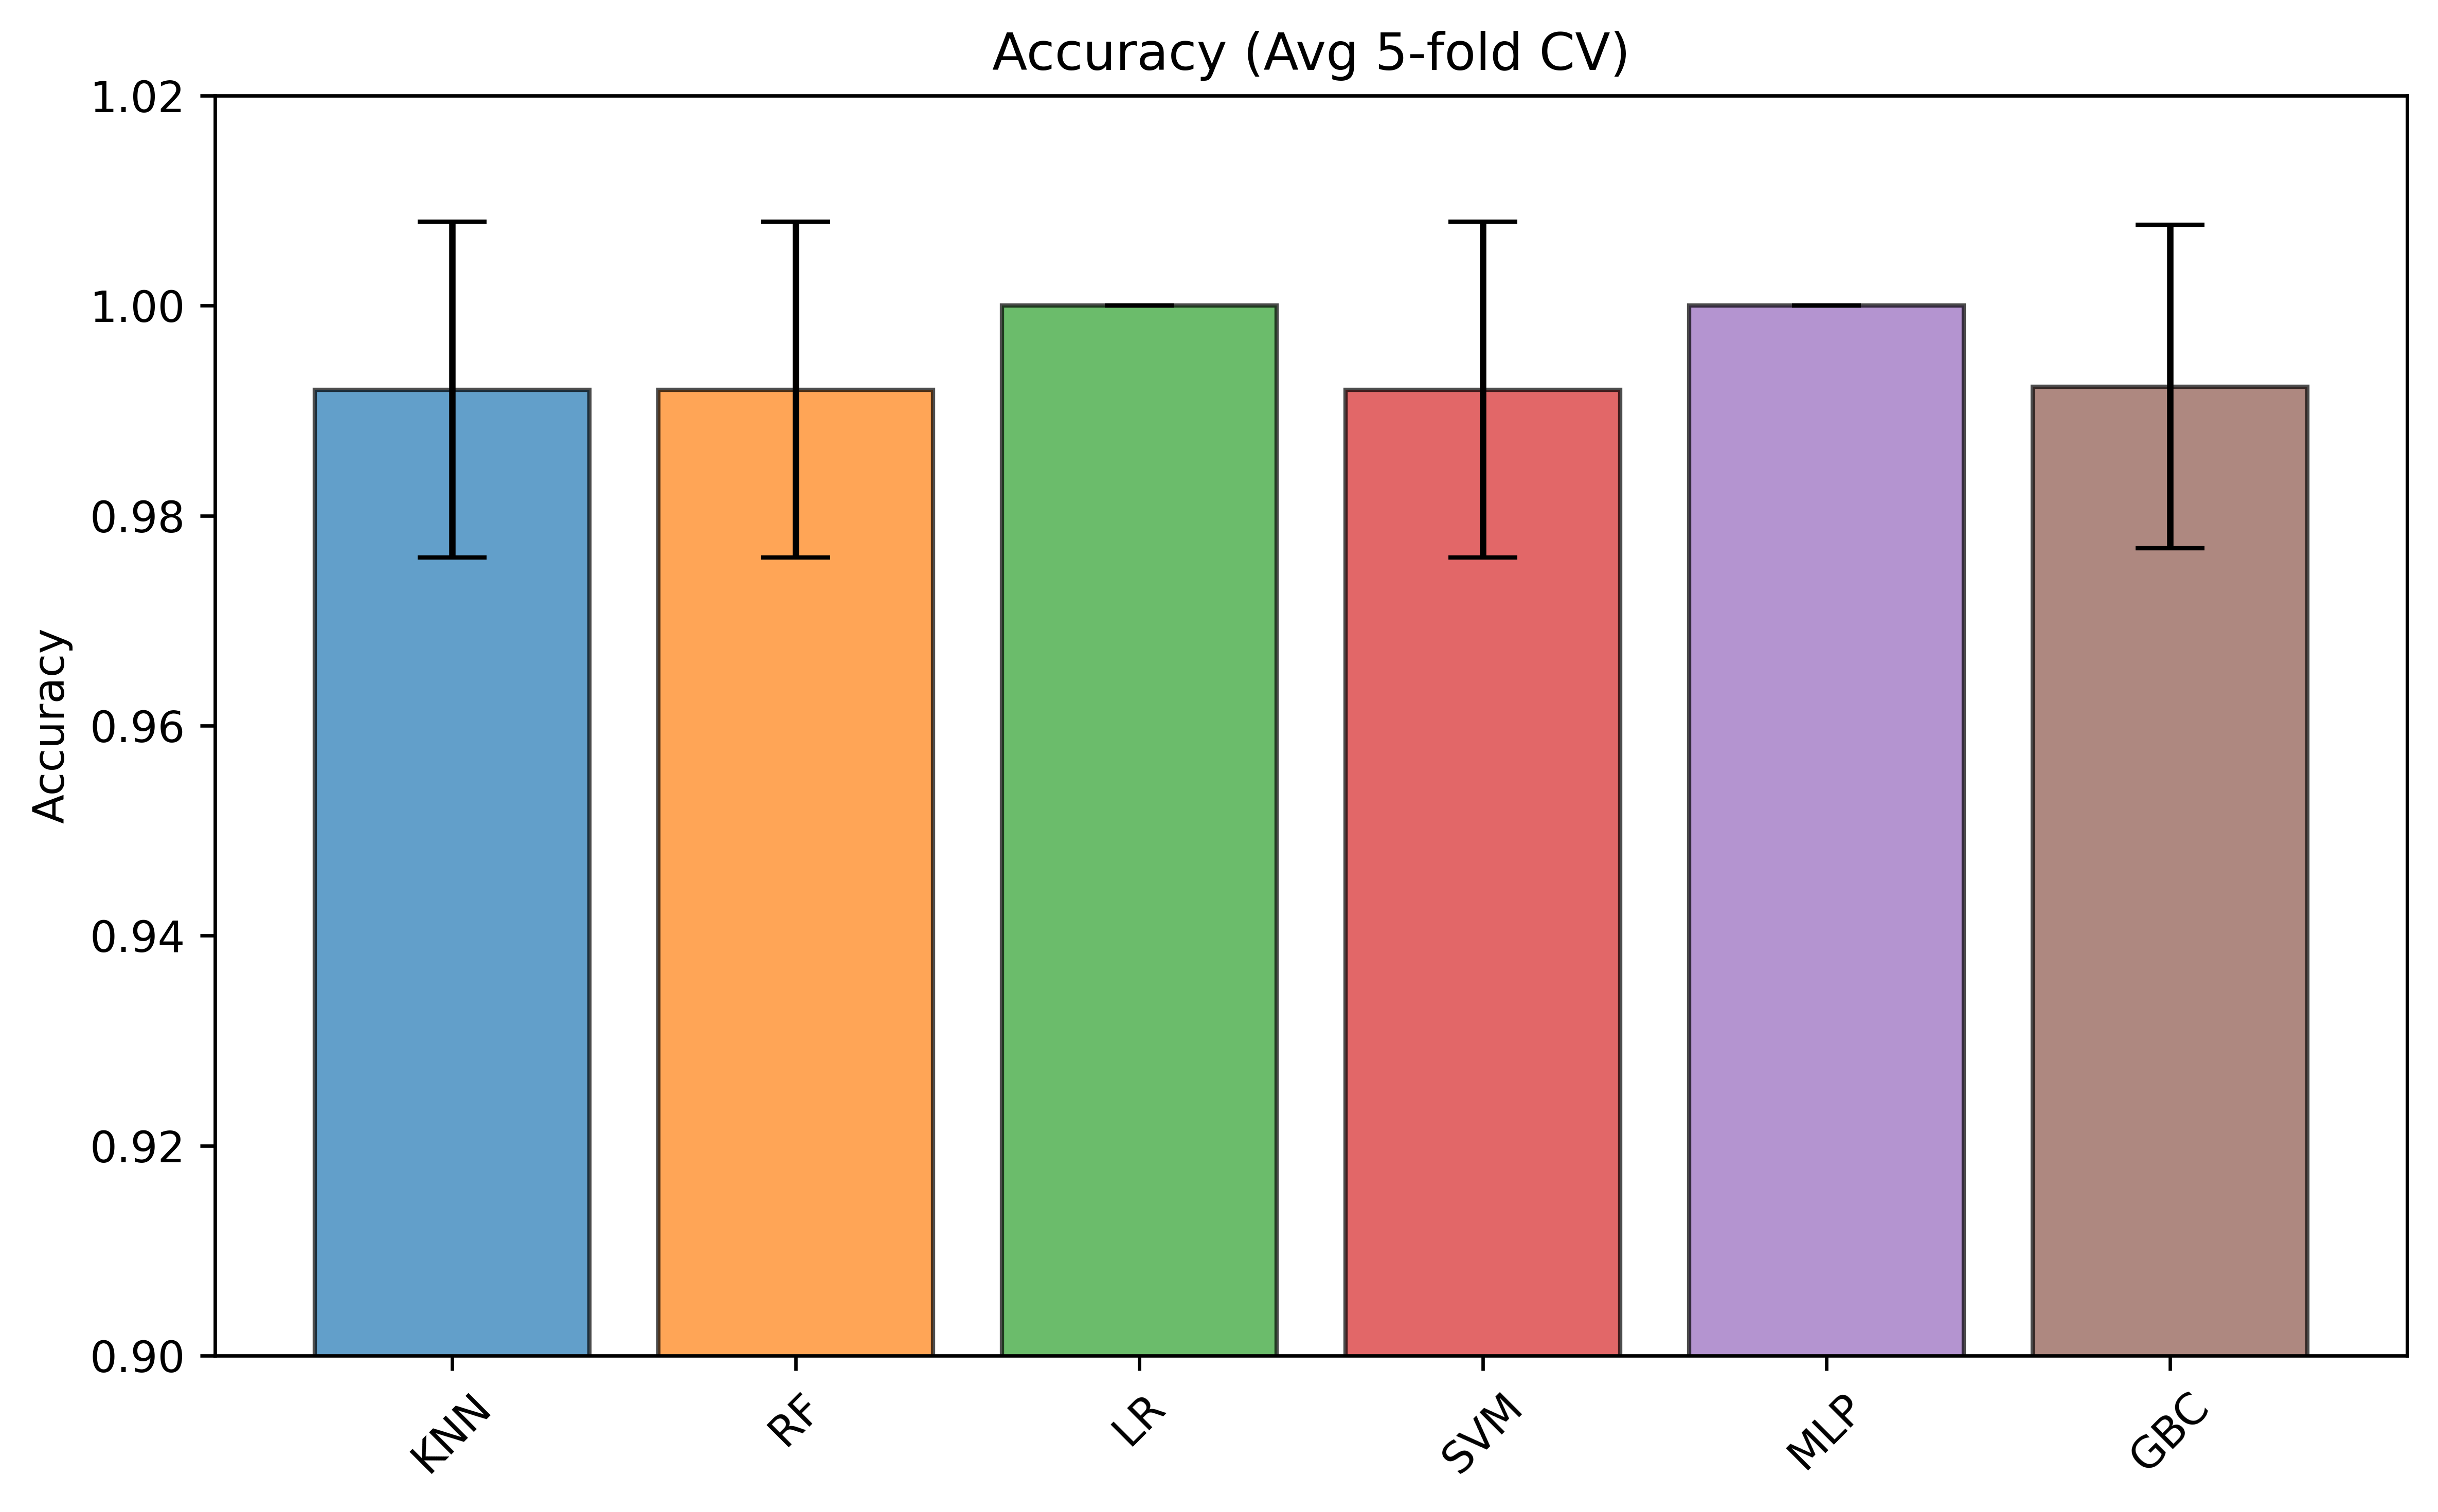

In [18]:
# Extract keys and values in order
models = list(Accuracies.keys())
means = [Accuracies[m] for m in models]
stds = [Accuracies_std[m] for m in models]

# Plot
plt.figure(figsize=(8, 5), dpi=600)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plt.bar(models, means, yerr=stds, capsize=8, color = colors, alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy')
plt.title('Accuracy (Avg 5-fold CV)')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.02)
plt.tight_layout()
plt.show()

## AUROC comparison

In [5]:
AUROC_data = {

    "KNN": {
        "probs": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        "first_fold_y_true": [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        "first_fold_y_probs": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
    },

    "RF": {
        "probs": [0.24, 0.37, 0.23, 0.28, 0.22, 0.3, 0.34, 0.9, 0.97, 0.86, 0.89, 0.82, 0.9, 0.96, 0.8, 0.96, 0.96, 0.78, 0.89, 0.91, 0.78, 0.9, 0.87, 0.91, 0.8, 0.92],
        "first_fold_y_true": [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        "first_fold_y_probs": [0.24, 0.37, 0.23, 0.28, 0.22, 0.3, 0.34, 0.9, 0.97, 0.86, 0.89, 0.82, 0.9, 0.96, 0.8, 0.96, 0.96, 0.78, 0.89, 0.91, 0.78, 0.9, 0.87, 0.91, 0.8, 0.92]
    }, 

    "LR": {
        "probs": [2.528665690169686e-134, 2.1821628025515805e-112, 0.0, 3.2769923780014454e-136, 1.978337474270752e-192, 6.355031971390507e-97, 2.116755269381345e-120, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        "first_fold_y_true": [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        "first_fold_y_probs":[2.528665690169686e-134, 2.1821628025515805e-112, 0.0, 3.2769923780014454e-136, 1.978337474270752e-192, 6.355031971390507e-97, 2.116755269381345e-120, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]},

    "SVM": {
        "probs": [0.0019934619535072846, 0.006841062621187181, 0.03558314665834602, 0.0019252263057409574, 0.0006724223567343814, 0.012910791682175318, 0.0019711142957884713, 0.9569053120573722, 0.976285399607433, 0.9843500782397847, 0.9876837502993171, 0.9865996974848814, 0.9866343014079204, 0.9895553885920233, 0.9862748612900467, 0.9837476061370549, 0.9875050390043388, 0.9128835583056404, 0.9778565237780261, 0.9791633126546782, 0.9866107122596486, 0.975188396381431, 0.9852907598899475, 0.9799325452826537, 0.983185669493724, 0.9770982959603421],
        "first_fold_y_true": [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        "first_fold_y_probs":[0.0019934619535072846, 0.006841062621187181, 0.03558314665834602, 0.0019252263057409574, 0.0006724223567343814, 0.012910791682175318, 0.0019711142957884713, 0.9569053120573722, 0.976285399607433, 0.9843500782397847, 0.9876837502993171, 0.9865996974848814, 0.9866343014079204, 0.9895553885920233, 0.9862748612900467, 0.9837476061370549, 0.9875050390043388, 0.9128835583056404, 0.9778565237780261, 0.9791633126546782, 0.9866107122596486, 0.975188396381431, 0.9852907598899475, 0.9799325452826537, 0.983185669493724, 0.9770982959603421]},

    "MLP": {"probs": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
            "first_fold_y_true": [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            "first_fold_y_probs": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]},

    "GBC": {"probs": [3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.6463633523313347, 0.9999890313177917, 0.9999890313177917],
                                     "first_fold_y_true": [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                     "first_fold_y_probs": [3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 3.179945503427521e-05, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.9999890313177917, 0.6463633523313347, 0.9999890313177917, 0.9999890313177917]} 
}

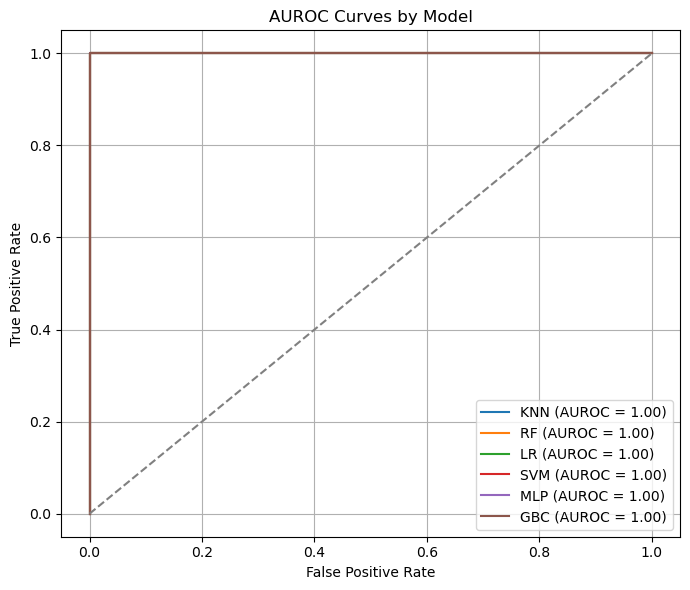

In [6]:
plt.figure(figsize=(7, 6))

# Plot ROC curves
for model_name, data in AUROC_data.items():
    y_true = data["first_fold_y_true"]
    y_probs = data["first_fold_y_probs"]
    
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    auc = roc_auc_score(y_true, y_probs)
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUROC = {auc:.2f})")

# Diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curves by Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()